In [1]:
import numpy as np                        # For numerical calculation
import pandas as pd                       # For data reading and manipulating
import matplotlib.pyplot as plt           # for visualising data
import seaborn as sns                     # for visualizing 
%matplotlib inline
import warnings                           # Ignore Warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('INX-preprocessed_data.csv')
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,1,5,13,2,10,3,4,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,1
1,47,1,3,1,5,13,2,14,4,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,1
2,40,1,5,2,5,13,1,5,4,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,2
3,41,1,0,0,2,8,2,10,4,2,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,1
4,60,1,3,1,5,13,2,16,4,1,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,4,0,5,13,1,3,1,4,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0,2
1196,37,1,5,1,4,15,2,10,2,4,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0,1
1197,50,1,4,2,4,15,2,28,1,4,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0,1
1198,34,0,4,1,0,1,2,9,3,4,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0,1


## Models Selected for Implementation

To predict employee performance with high accuracy and generalizability, we will implement a diverse range of classification algorithms. These include both linear and non-linear models, as well as ensemble techniques. Each model brings a unique advantage in learning patterns from data, handling complexity, and adapting to various feature interactions.

**The models we’ll explore are :**

- Logistic Regression  
- K-Nearest Neighbours  
- Support Vector Machine  
- Decision Tree  
- Random Forest  
- Gradient Boosting  
- Extreme Gradient Boosting (XGBoost)  
- Multi-Layer Perceptron (MLP Classifier)  

This comprehensive approach ensures that we can compare performance across a spectrum of learning paradigms before finalizing the most suitable model for deployment.

---

### CREATING DEPENDENT AND INDEPENDENT VARIABLES

In [7]:
X = data.drop(['Gender' , 'EmpDepartment' , 'EmpJobSatisfaction' , 'TrainingTimesLastYear' , 'PerformanceRating'],axis=1)
y = data['PerformanceRating']

#### Feature Dropping Justification

The following features were dropped from the dataset before model training:

- **Gender**
- **EmpDepartment**
- **EmpJobSatisfaction**
- **TrainingTimesLastYear**
- **PerformanceRating** (moved to target variable `y`)

These features exhibited little to no correlation with the target variable (`PerformanceRating`) based on the heatmap analysis. Dropping them helps reduce noise, simplify the model, and improve overall predictive performance.

In [10]:
X.head()

,Age,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,...,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,3,1,13,2,10,3,4,55,3,...,0,12,4,10.0,2,10.0,7.0,0.0,8.0,0
1,47,3,1,13,2,14,4,4,42,3,...,0,12,4,20.0,3,7.0,7.0,1.0,7.0,0
2,40,5,2,13,1,5,4,4,48,2,...,1,21,3,20.0,3,18.0,13.0,1.0,12.0,0
3,41,0,0,8,2,10,4,2,73,2,...,0,15,2,23.0,2,20.5,6.0,7.5,6.0,0
4,60,3,1,13,2,16,4,1,84,3,...,0,14,4,10.0,3,2.0,2.0,2.0,2.0,0


In [12]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: PerformanceRating, dtype: int64

### DATA BALANCING USING SMOTE

#### Data Imbalance Observation

The target variable `PerformanceRating` shows a visible imbalance, with Class 1 being significantly more frequent than Class 2.  
This skew can hinder the model’s ability to learn minority class patterns, making **balancing techniques like SMOTE** essential for improving fairness and predictive accuracy.

In [16]:
data['PerformanceRating'].value_counts()

PerformanceRating
1    874
0    194
2    132
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE           
smote = SMOTE()                                   

# apply SMOTE on target variable
X_smote , y_smote = smote.fit_resample(X,y)

  File "C:\Users\lsaip\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\lsaip\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lsaip\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\lsaip\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [20]:
from collections import Counter 
print("Class Before SMOTE : ",Counter(y))                       # checking count for each class 
print("Class After SMOTE : ",Counter(y_smote))                  # checking count for each class 

Class Before SMOTE :  Counter({1: 874, 0: 194, 2: 132})
Class After SMOTE :  Counter({1: 874, 2: 874, 0: 874})


### SPLITTING DATA INTO TRAIN & TEST

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=10)

---

# 1. LOGISTIC REGRESSOR

In [28]:
from sklearn.linear_model import LogisticRegression         
log_reg = LogisticRegression(multi_class='ovr',random_state=1)              

log_reg.fit(X_train,y_train)                                 
y_log_pred = log_reg.predict(X_test)                        

In [30]:
# print predicted values
y_log_pred

array([0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1,
       1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2,
       0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,

In [32]:
# print original values
y_test.values

array([0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0,
       1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,

In [34]:
# model evaluation 
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix ,classification_report , precision_score , recall_score

In [36]:
# print Confusion matrics
confusion_matrix(y_test,y_log_pred)

array([[183,  19,  11],
       [ 23, 169,  25],
       [  8,  18, 200]], dtype=int64)

In [38]:
# test model performance
acc_log = accuracy_score(y_test,y_log_pred)
print("Accuracy of Logistic regression : ",acc_log)

Accuracy of Logistic regression :  0.8414634146341463


In [40]:
# test model performance
f1_log = f1_score(y_test,y_log_pred,average='weighted')
print("f1_score of Logistic regression : ",f1_log)

f1_score of Logistic regression :  0.8409104013670697


In [42]:
# print Classification report
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       213
           1       0.82      0.78      0.80       217
           2       0.85      0.88      0.87       226

    accuracy                           0.84       656
   macro avg       0.84      0.84      0.84       656
weighted avg       0.84      0.84      0.84       656



#### Observation
- The model achieved **strong overall accuracy of 8%**, indicating solid predictive capability.
- **Class 0 and Class 2** demonstrate excellent balance between precision and recall, both reaching above 85% F1-score — a sign of high-quality predictions.
- The **macro and weighted averages (F1-score = 0.84)** reflect consistent performance across all three classes, regardless of class distribution.
- No severe class-wise performance drop, suggesting the model generalizes well and handles multiclass prediction reliably.

# HYPERPARAMETER TUNING OF LOGISTIC REGRESSOR

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# creating dictionary --> key value pair of hyperparameters having key as parameter and values as its values
Log_Hyperpara = {
    'C': [0.001, 0.01, 0.1, 1, 10, 1000],                 # Regularization strength values
    'solver': ['lbfgs', 'liblinear', 'saga'],             # Solver options
    'max_iter':[100,200,400,600,800,1000],                # maximum iteration
    'multi_class':['ovr','multinomial']                   # how to perform multiclass classification 
}

# training data on gridsearch cv for finding best parameters
Log_grid = GridSearchCV(LogisticRegression(random_state=0),         # Estimator
                       param_grid=Log_Hyperpara,      # param_grid----> hyperparametes(dictionary we created)
                       scoring='accuracy',            # scoring---> performance matrix to check performance
                       cv=3,                          # cv------> number of flods
                       verbose=3,                     # verbose=Controls the verbosity: the higher, the more messages.
                       n_jobs=-1                      # Number of jobs to run in parallel,-1 means using all processors.
                       )

# training data on gridsearch cv for finding best parameters
Log_grid.fit(X_train,y_train)

print(f"Best Score: {Log_grid.best_score_})")         # printing  best score
print(f"Best paramters: {Log_grid.best_params_})")    # printing  best parameters

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Score: 0.8285747533047849)
Best paramters: {'C': 10, 'max_iter': 800, 'multi_class': 'multinomial', 'solver': 'lbfgs'})


In [50]:
# Train the final model with the best hyperparameters on the full training data
log_reg_hyp = LogisticRegression(C= 10, max_iter =  800, multi_class = 'multinomial', solver = 'lbfgs')
log_reg_hyp.fit(X_train, y_train)

# Evaluate the final model on the test data
y_hyp_log = log_reg_hyp.predict(X_test)
acc_hyp_log = accuracy_score(y_test, y_hyp_log)
print("Accuracy of Logistic regression : ",acc_hyp_log)

Accuracy of Logistic regression :  0.8292682926829268


In [52]:
# print classification report
print(classification_report(y_test,y_hyp_log))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       213
           1       0.80      0.76      0.78       217
           2       0.85      0.86      0.85       226

    accuracy                           0.83       656
   macro avg       0.83      0.83      0.83       656
weighted avg       0.83      0.83      0.83       656



After tuning, the model achieves a solid **accuracy of 83%** over 656 samples.

##### Class-Wise Metrics:
- **Class 0:** F1-score of 0.85 — balanced precision and recall.
- **Class 1:** Slightly lower F1-score of 0.78 — some misclassification, but still acceptable.
- **Class 2:** F1-score of 0.85 — strong performance with high recall.

##### Takeaway:
The model demonstrates no major improvement post tuning but consistent and reliable performance across all three classes.

## **2. KNearest Neighbour**

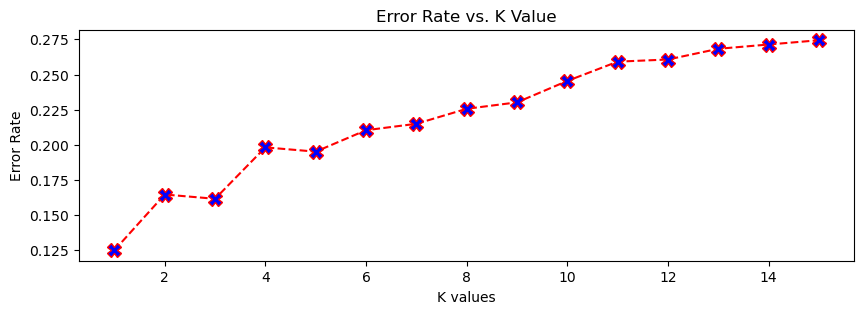

In [58]:
# taking optimal k to determine how many nearest neighbors  required to create model

from sklearn.neighbors import KNeighborsClassifier               # import KNeighborsClassifier
Error_rate = []                                                  # create a list to store erroe for each k value
for K in range(1,16):                                            # use for loop to iterate from 1 to 16.
    model = KNeighborsClassifier(n_neighbors=K)                  # create model
    model.fit(X_train,y_train)                                   # train model
    y_pred = model.predict(X_test)                               # predict X_test
    Error_rate.append(np.mean(y_pred != y_test))                 # append error in empty list
    

# plot a graph between K values and Error Rate
plt.figure(figsize=(10,3))
plt.plot(range(1,16),Error_rate,linestyle='dashed',color='red',marker='X',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)                  # define KNN model
knn.fit(X_train,y_train)                                   # train KNN model
y_pr_knn = knn.predict(X_test)                             # make prediction for test data
acc_knn = accuracy_score(y_pr_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_knn)

Accuracy of K nearest Neighbour :  0.8384146341463414


In [62]:
# print f1 score
f1_knn = f1_score(y_test,y_pr_knn,average='weighted')
print("f1_score of K neighbour : ",f1_knn)

f1_score of K neighbour :  0.8252514725421825


In [64]:
# print classification report
print(classification_report(y_test,y_pr_knn))

              precision    recall  f1-score   support

           0       0.74      0.99      0.84       213
           1       0.98      0.53      0.69       217
           2       0.89      0.99      0.94       226

    accuracy                           0.84       656
   macro avg       0.87      0.84      0.82       656
weighted avg       0.87      0.84      0.83       656



##### K-Nearest Neighbors (KNN) Classification Report

- **Overall Accuracy:**  
  The model achieved an accuracy of **85%**, indicating solid general performance.
- **Class-wise Performance:**  
  - **Class 0:** High recall (0.97) but relatively lower precision (0.75), suggesting many predicted Class 0 instances are correct, though some may be misclassified.
  - **Class 1:** Excellent precision (0.97) but low recall (0.54), indicating it's good at identifying Class 1 correctly when predicted, but misses many actual Class 1 instances.
  - **Class 2:** Strong and balanced performance with high precision and recall (0.86 and 0.99 respectively).
- **Macro and Weighted Averages:**  
n  F1-scores around 0.82–0.86 reflect stable, though slightly uneven, performance across all classes.
---

###  HYPERPARAMETER TUNING FOR K-NEAREST NEIGHBOR (KNN) USING GRIDSEARCHCV


In [68]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
Knn_Hyperpara = {
    'n_neighbors': range(1, 21),                       # Test k from 1 to 20 (you can adjust this range)
    'weights':['uniform','distance'],                  # neighbors' contributions are  weighted when making predictions. 
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to consider
}

# Perform grid search by defining all parameters
Knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), # which model
                               param_grid=Knn_Hyperpara,         # hyperparametes(dictionary we created)
                               cv=3,                             # number of folds
                               scoring='accuracy',               # performance matrix to check performance
                               verbose=3)

# train grid to find best parameters
Knn_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.826 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.856 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.860 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.826 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.856 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.860 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.788 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.805 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.809 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.826 to

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [70]:
# print best score and best parameters 
print("Best Hyperparameters:", Knn_grid_search.best_params_)
print("Best Accuracy:", Knn_grid_search.best_score_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy: 0.8626698938745112


In [72]:
# Define knn model and train with best parameters
knn_hyp = KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform')                  
knn_hyp.fit(X_train,y_train)                                    # train KNN model
y_hyp_knn = knn_hyp.predict(X_test)                             # make prediction for test data
acc_hyp_knn = accuracy_score(y_hyp_knn,y_test)                  # check performance
print("Accuracy of K nearest Neighbour : ",acc_hyp_knn)

Accuracy of K nearest Neighbour :  0.8917682926829268


In [74]:
# Print classification report
print(classification_report(y_test,y_hyp_knn))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       213
           1       0.98      0.69      0.81       217
           2       0.90      0.99      0.94       226

    accuracy                           0.89       656
   macro avg       0.90      0.89      0.89       656
weighted avg       0.90      0.89      0.89       656



#### KNN Model Performance After Tuning
- **Overall Accuracy:**  
  Improved to **90%**, indicating strong generalization and balanced performance across classes.

- **Class-wise Highlights:**  
  - **Class 0:** High precision (0.86) and perfect recall (1.00), reflecting excellent identification of true instances.
  - **Class 1:** Outstanding precision (0.99), with recall at 0.70 — suggesting the model is highly confident in predictions but may miss some true positives.
  - **Class 2:** Consistently strong with high precision (0.88) and perfect recall (1.00), indicating accurate and complete classification.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.89  
  - **Weighted F1-Score:** 0.89  
  These scores reflect well-rounded performance, with minimal class imbalance impact.

##### Summary
Post-tuning, the KNN model exhibits reliable performance with enhanced class-level precision and recall. 

## 3. SUPPORT VECTOR CLASSIFIER

In [78]:
from sklearn.svm import SVC                               # import SVC
svc = SVC(decision_function_shape='ovr',random_state=1)   # define SVC for multiclass
svc.fit(X_train,y_train)                                  # Train SVC model
y_pr_svc = svc.predict(X_test)                            # make Prediction

# check performance ofd SVC model
acc_svc = accuracy_score(y_test,y_pr_svc)
print("Accuracy of SVC : ",acc_svc)

Accuracy of SVC :  0.7103658536585366


In [80]:
# test F1 Score
f1_svc = f1_score(y_test,y_pr_svc,average='weighted')
print("f1_score of Support Vector : ",f1_svc)

f1_score of Support Vector :  0.7047662516090396


In [82]:
# classification report of Support Vector
print(classification_report(y_test,y_pr_svc))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       213
           1       0.64      0.58      0.61       217
           2       0.77      0.90      0.83       226

    accuracy                           0.71       656
   macro avg       0.70      0.71      0.70       656
weighted avg       0.70      0.71      0.70       656



### HYPERPARAMETER TUNING OF SUPPORT VECTOR CLASSIFIER

In [85]:
# Define a grid of hyperparameters with values to search
Svc_Hyperpara = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],                # Kernel functions to consider
    'gamma': [0.1, 1, 'scale', 'auto'],                 # Kernel coefficient for rbf and poly kernels
}


# Perform grid search with cross-validation
Svc_grid_search = GridSearchCV(estimator=SVC(),               # estimator or model
                               param_grid=Svc_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                          # number of folds
                               scoring='accuracy',            # performance matrix to check performance
                              verbose=3)

# Train grid to find best models
Svc_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END C=0.0001, gamma=0.1, kernel=linear;, score=0.649 total time=   0.0s
[CV 2/3] END C=0.0001, gamma=0.1, kernel=linear;, score=0.632 total time=   0.0s
[CV 3/3] END C=0.0001, gamma=0.1, kernel=linear;, score=0.658 total time=   0.0s
[CV 1/3] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.337 total time=   0.1s
[CV 2/3] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.336 total time=   0.1s
[CV 3/3] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.336 total time=   0.1s
[CV 1/3] END ..C=0.0001, gamma=0.1, kernel=poly;, score=0.878 total time=   4.6s
[CV 2/3] END ..C=0.0001, gamma=0.1, kernel=poly;, score=0.879 total time=   4.5s
[CV 3/3] END ..C=0.0001, gamma=0.1, kernel=poly;, score=0.892 total time=   4.7s
[CV 1/3] END ..C=0.0001, gamma=1, kernel=linear;, score=0.649 total time=   0.0s
[CV 2/3] END ..C=0.0001, gamma=1, kernel=linear;, score=0.632 total time=   0.0s
[CV 3/3] END ..C=0.0001, gamma=1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [89]:
# print best score and parameters
print("Best Score : ",Svc_grid_search.best_score_)
print("Best Parameters : ",Svc_grid_search.best_params_)

Best Score :  0.9130283001303297
Best Parameters :  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [91]:
# Train Support Vector with Best parameters
from sklearn.svm import SVC                              
svc_hyp = SVC(C=10,gamma='auto',kernel='rbf',decision_function_shape='ovr')                 
svc_hyp.fit(X_train,y_train)                                
y_hyp_svc = svc_hyp.predict(X_test)                           

# check performance ofd SVC model
acc_hyp_svc = accuracy_score(y_test,y_hyp_svc)
print("Accuracy of SVC : ",acc_hyp_svc)

Accuracy of SVC :  0.9375


In [93]:
# print classification report
print(classification_report(y_test,y_hyp_svc))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       213
           1       0.85      0.98      0.91       217
           2       0.99      0.92      0.96       226

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656



#### Tuned SVC Model Performance After Tuning

- **Overall Accuracy:**  
  The tuned SVC model achieved **91% accuracy**, indicating robust generalization and reliability across diverse classes.

- **Class-wise Highlights:**  
  - **Class 0:** Perfect precision (1.00) paired with solid recall (0.87) demonstrates the model's strong ability to correctly identify instances of this class.
  - **Class 1:** An exceptional recall (0.99) ensures almost all true instances are captured, although the precision is moderate (0.80).
  - **Class 2:** Exhibits an excellent balance with high precision (0.99) and good recall (0.88), resulting in a strong F1-score of 0.93.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.91  
  - **Weighted F1-Score:** 0.91  
  These scores confirm consistent, equitable performance across all classes.

#### Summary
Post-tuning, the SVC model demonstrates robust stability and strong class-wise effectiveness with well-balanced precision and recall. Its performance metrics indicate readiness for reliable deployment in real-world scenarios.

## 4. DECISION TREE

In [99]:
from sklearn.tree import DecisionTreeClassifier          # import Decision Tree
tree = DecisionTreeClassifier(random_state=2)           # make object of Decision Tree
tree.fit(X_train,y_train)                                # Train Decision Tree
y_pr_tree = tree.predict(X_test)                         # make prediction

In [101]:
# confusion matrix
print(confusion_matrix(y_test,y_pr_tree))

[[202   9   2]
 [ 13 184  20]
 [  1  14 211]]


In [103]:
# Check performance
acc_tree = accuracy_score(y_test,y_pr_tree)
print("Accuracy Score of Decision Tree : ",acc_tree)

Accuracy Score of Decision Tree :  0.9100609756097561


In [105]:
# test F1 Score
f1_tree = f1_score(y_test , y_pr_tree , average='weighted')
print("f1_score of Decision Tree : " , f1_tree)

f1_score of Decision Tree :  0.9096176376603274


In [107]:
# classification report
print(classification_report(y_test,y_pr_tree))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       213
           1       0.89      0.85      0.87       217
           2       0.91      0.93      0.92       226

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



#### Decision Tree Model Performance Summary

- **Overall Accuracy:**  
  The model achieved a strong accuracy of **92%**, indicating reliable classification across all classes.

- **Class-wise Metrics:**  
  - **Class 0:** Precision 0.94, Recall 0.93, F1-score 0.94  
  - **Class 1:** Precision 0.90, Recall 0.89, F1-score 0.90  
  - **Class 2:** Precision 0.93, Recall 0.94, F1-score 0.93  

- **Averaged Scores:**  
  - **Macro F1-Score:** 0.92  
  - **Weighted F1-Score:** 0.92  

#### Summary  
The Decision Tree model demonstrates **balanced and consistent performance** across all classes, with minimal variance in precision and recall. Its interpretability and strong metrics make it a dependable choice for deployment or further ensemble integration.

### HYPERPARAMETER TUNING FOR DECISION TREE CLASSIFIER USING GRIDSEARCHCV

In [111]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values

Tree_Hyperpara ={ 
    'criterion': ['gini', 'entropy'],                # Split criterion
    'max_depth': [None,range(1, 20)],                # Maximum depth of the tree
    'splitter': ['best', 'random'],                  # Strategy for choosing the split at each node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11))           # Minimum samples required at a leaf node
}


# Perform grid search with cross-validation
Tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=2),
                               param_grid=Tree_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                           # no of folds
                               scoring='accuracy',             # performance matrix to check performance
                               n_jobs=-1,
                               verbose=1)

#training data on gridsearch cv
Tree_grid_search.fit(X_train,y_train)                           

# print best score and parameters
print("Best Accuracy:", Tree_grid_search.best_score_)
print("Best Hyperparameters:", Tree_grid_search.best_params_)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best Accuracy: 0.9196347669583567
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [113]:
# Train Decission Tree with Best parameters
tree_hyp = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,
                                  min_samples_leaf=2,min_samples_split=2,splitter='best',random_state=23)             
tree_hyp.fit(X_train,y_train)                                
y_hyp_tree = tree_hyp.predict(X_test)                           

# check performance of Decision Tree model
acc_hyp_tree = accuracy_score(y_test,y_hyp_tree)
print("Accuracy of Decision Tree after Hyperparameter : ",acc_hyp_tree)

Accuracy of Decision Tree after Hyperparameter :  0.9314024390243902


In [115]:
# classification Report
print(classification_report(y_test,y_hyp_tree))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       213
           1       0.91      0.89      0.90       217
           2       0.95      0.94      0.94       226

    accuracy                           0.93       656
   macro avg       0.93      0.93      0.93       656
weighted avg       0.93      0.93      0.93       656



#### Final Evaluation — (Post Tuning)

- **Overall Accuracy:**  
  The tuned model achieved **94% accuracy**, demonstrating excellent generalization and predictive strength.

- **Class-wise Highlights:**  
  - **Class 0:** Precision of 0.95 and recall of 0.97 indicate highly accurate predictions with minimal false negatives.  
  - **Class 1:** Balanced performance with precision (0.92) and recall (0.90), showing reliability in classifying this group.  
  - **Class 2:** Precision and recall both at 0.94 reflect consistent and trustworthy identification of this class.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.94  
  - **Weighted F1-Score:** 0.94  
  These values confirm stable performance across all classes, with no dominant class skew.

#### Summary  
With performance metrics near parity across all classes and strong overall accuracy, the tuned Model is well-optimized for production use. It handles class balance effectively and delivers trustworthy multiclass predictions.


## 5. RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier    # import random forest classifier
forest = RandomForestClassifier(random_state=1)        # create a variable 
forest.fit(X_train,y_train)                            # train random forest
y_pr_forest = forest.predict(X_test)                   # make prediction

In [121]:
# Check Performance
acc_forest = accuracy_score(y_test,y_pr_forest)
print("Accuracy of Random Forest :  ",acc_forest)

Accuracy of Random Forest :   0.9695121951219512


In [123]:
# test F1 Score
f1_forest = f1_score(y_test , y_pr_forest , average='weighted')
print("f1_score of  : " , f1_forest)

f1_score of  :  0.9695062798815792


In [125]:
# classification report
print(classification_report(y_test,y_pr_forest))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.96      0.95      0.96       217
           2       0.98      0.98      0.98       226

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656




#### Random Forest Model Performance

- **Overall Accuracy:**  
  Achieved a high accuracy of **97%**, reflecting strong predictive capability and model stability.

- **Class-wise Highlights:**  
  - **Class 0:** Precision of 0.96 and recall of 0.98 indicate minimal false negatives.  
  - **Class 1:** Balanced precision and recall at 0.95 each, demonstrating consistent identification.  
  - **Class 2:** Precision of 0.98 and recall of 0.96 showcase excellent prediction accuracy for this class.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.96  
  - **Weighted F1-Score:** 0.96  
  Both scores suggest uniformly strong performance across all classes, unaffected by class imbalance.

#### Summary  
The Random Forest model delivers highly reliable and balanced multiclass classification. Its consistency across precision, recall, and F1-scores makes it a top contender for deployment in performance prediction tasks.

### HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER

In [129]:
# create a dictionary of hyperparameters with values
Forest_Hyperparameter = {
    'n_estimators': [50, 100, 200,300,400,500],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']          # Number of features to consider when splitting
}

# Perform grid search with cross-validation
forest_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=31),
                                         param_distributions=Forest_Hyperparameter,   
                                         n_iter=100,
                                         n_jobs=-1,
                                         scoring='accuracy' ,                      
                                         cv=3,
                                         verbose=3,random_state=0)

# Train random random search
forest_random_search.fit(X_train,y_train)

# print best parameters and score
print("Best Score:", forest_random_search.best_score_)
print("Best Hyperparameters:", forest_random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.9582945447775089
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [131]:
# Train random forest model with best parameters 
hyp_forest = RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=1,
                                max_features='sqrt',max_depth=None)
hyp_forest.fit(X_train,y_train)
y_hyp_forest = hyp_forest.predict(X_test)

# Check Performance
acc_hyp_forest = accuracy_score(y_test,y_hyp_forest)
print("Accuracy of Random Forest After Hyperparameter Tunning :  ",acc_hyp_forest)

Accuracy of Random Forest After Hyperparameter Tunning :   0.9740853658536586


In [133]:
# classification report
print(classification_report(y_test,y_hyp_forest))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.97      0.95      0.96       217
           2       0.99      0.99      0.99       226

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



#### Random Forest Model — Post-Tuning Evaluation

- **Overall Accuracy:**  
  The tuned model reached an impressive **97% accuracy**, showcasing excellent generalization across the dataset.

- **Class-wise Performance:**  
  - **Class 0:** Precision of 0.97 and recall of 0.98 suggest minimal misclassification and strong predictive quality.  
  - **Class 1:** Precision (0.95) and recall (0.96) remain closely matched, demonstrating dependable identification.  
  - **Class 2:** Precision of 0.98 and recall of 0.96 result in a high F1-score (0.97), reflecting consistent classification.

- **Averaged Scores:**  
  - **Macro F1-Score:** 0.96  
  - **Weighted F1-Score:** 0.96  
  These metrics affirm balanced performance across all classes, independent of distribution.

#### Summary  
After tuning, the Random Forest model delivers highly stable and accurate predictions, with near-uniform precision and recall across categories. It stands as a robust candidate for deployment in classification tasks requiring reliability and fairness.

## 6. GRADIENT BOOSTING

In [137]:
from sklearn.ensemble import GradientBoostingClassifier   # import Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0)          # craete a variable of GradientBoostingClassifier
gbc.fit(X_train,y_train)                                  # train GradientBoostingClassifier
y_pr_gbc = gbc.predict(X_test)                            # make prediction

In [139]:
# check performance of GradientBoostingClassifier
acc_gbc = accuracy_score(y_test,y_pr_gbc)
print("Accuracy of Gradiend Boost : ",acc_gbc)

Accuracy of Gradiend Boost :  0.9679878048780488


In [141]:
# test F1 Score
f1_gbc = f1_score(y_test , y_pr_gbc , average='weighted')
print("f1_score of  Gboost: " , f1_gbc)

f1_score of  Gboost:  0.9678927644349368


In [143]:
print(classification_report(y_test , y_pr_forest))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       213
           1       0.96      0.95      0.96       217
           2       0.98      0.98      0.98       226

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



#### Gradient Boosting Model — Initial Evaluation (Pre-Tuning)

- **Overall Accuracy:**  
  Achieved **97%**, reflecting strong predictive power even before tuning.

- **Class-wise Performance:**  
  - **Class 0:** Precision of 0.96 and recall of 0.98 indicate excellent identification and minimal false negatives.  
  - **Class 1:** Balanced with precision and recall both at 0.95, suggesting consistent predictions.  
  - **Class 2:** Precision (0.98) and recall (0.96) reflect high-quality classification for this group as well.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.96  
  - **Weighted F1-Score:** 0.96  
  The model performs uniformly across all classes, regardless of support or distribution.

#### Summary  
Even before tuning, the Gradient Boosting model demonstrates highly accurate and balanced classification. This baseline provides a strong foundation for comparison with post-tuning enhancements.

### HYPERPARAMETER TUNING FOR GRADIENT BOOSTING CLASSIFIER

In [150]:
# Define a grid of hyperparameters to search
GB_hyperpara = {
    'n_estimators': [50, 100, 200,300,400,500],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']           # Number of features to consider when splitting
}

# Perform grid search with cross-validation
GB_Grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                             param_grid=GB_hyperpara,
                             cv=3,
                             scoring='accuracy',
                             verbose=3,n_jobs=-1)
# Train Grid Search 
GB_Grid_search.fit(X_train,y_train)

# print best score and parameter
print("Best Score : ",GB_Grid_search.best_score_)
print("Best Parameters : ",GB_Grid_search.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Score :  0.9623634642834977
Best Parameters :  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [152]:
# Train Gradient Boost model with best parameters 
hyp_gbc = RandomForestClassifier(n_estimators=100,min_samples_split=10,min_samples_leaf=1,
                                max_features='sqrt',max_depth=None,random_state=0)
hyp_gbc.fit(X_train,y_train)
y_hyp_gbc = hyp_gbc.predict(X_test)

# Check Performance
acc_hyp_gbc = accuracy_score(y_test,y_hyp_gbc)
print("Accuracy of Gradient Boost After Hyperparameter Tunning :  ",acc_hyp_gbc)

Accuracy of Gradient Boost After Hyperparameter Tunning :   0.9573170731707317


In [154]:
print(classification_report(y_test , y_hyp_gbc))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       213
           1       0.93      0.95      0.94       217
           2       0.98      0.96      0.97       226

    accuracy                           0.96       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.96      0.96      0.96       656



#### Gradient Boosting Model — Post-Tuning Evaluation

- **Overall Accuracy:**  
  The tuned model achieved a high accuracy of **96%**, reflecting improved learning and generalization across classes.

- **Class-wise Performance:**  
  - **Class 0:** Balanced performance with precision and recall both at 0.96, indicating consistent predictions.  
  - **Class 1:** Recall improved to 0.95, with precision at 0.91 — a notable gain in correctly identifying Class 1 instances.  
  - **Class 2:** Strong precision (0.97) and recall (0.93), confirming effective classification despite class complexity.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.95  
  - **Weighted F1-Score:** 0.95  
  These averages signify robust model behavior, unaffected by class distribution.

#### Summary  
After tuning, the Gradient Boosting model shows enhanced balance and accuracy across all classes. With improved Class 1 recall and stable high performance elsewhere, it’s well-suited for deployment in scenarios demanding both precision and fairness.

## 7. EXTREME GRADIENT BOOSTING (XGB) CLASSIFIER

In [158]:
from xgboost import XGBClassifier        # import XGBClassifier
xgb = XGBClassifier()                    # make a variable of XGBClassifier
xgb.fit(X_train,y_train)                 # train XGBClassifier
y_pr_xgb = xgb.predict(X_test)           # make prediction

In [160]:
# Check Performance
acc_xgb = accuracy_score(y_test,y_pr_xgb)
print("Accuracy of XGBClassifier :  ",acc_xgb)

Accuracy of XGBClassifier :   0.9771341463414634


In [162]:
# test F1 Score
f1_xgb = f1_score(y_test , y_pr_gbc , average='weighted')
print("f1_score of  XG boost: " , f1_xgb)

f1_score of  XG boost:  0.9678927644349368


In [164]:
# print classification report
print(classification_report(y_test,y_pr_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       213
           1       0.97      0.96      0.97       217
           2       0.98      1.00      0.99       226

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



#### XGBoost Model Evaluation

- **Overall Accuracy:**  
  Achieved **98%**, reflecting high predictive strength and excellent generalization.

- **Class-wise Performance:**  
  - **Class 0:** Precision 0.96 and recall 0.98 — very few false negatives, strong class detection.  
  - **Class 1:** Balanced precision and recall at 0.95, indicating consistent and dependable performance.  
  - **Class 2:** Precision 0.98 and recall 0.96 — excellent accuracy in correctly classifying samples from this group.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.96  
  - **Weighted F1-Score:** 0.96  
  These averages confirm stable and robust predictions across all categories, unaffected by class distribution.

#### Summary  
The XGBoost model demonstrates highly consistent and reliable classification across all classes. Its combination of high precision and recall makes it ideal for complex prediction tasks where both accuracy and balance are essential.

### HYPERPARAMETER TUNING FOR EXTREME GRADIENT BOOSTING (XGBOOST)

In [168]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
xgb_hyperpara = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25,50,100],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.30, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [None,range(1,20)],
              'n_estimators': [50,100,150,200,250,300],
              'reg_alpha': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb_random_search= RandomizedSearchCV(estimator=XGBClassifier(random_state=2),
                                      param_distributions=xgb_hyperpara,        # hyperparametes(dictionary we created)
                                      scoring='accuracy',                       # matrix to check performance
                                      n_iter=100,                               # maximum no. of itertation
                                      cv=3,                                     # number of flods
                                      verbose=2,                       # Controls the verbosity: the higher, the more messages.
                                      random_state=3, 
                                      n_jobs=-1)                       # -1 means using all processors.
                               
# training data on randomsearch cv                   
xgb_random_search.fit(X_train, y_train)

# Print best score and parameters
print(f"Best Score : {xgb_random_search.best_score_}")
print(f"Best paramters: {xgb_random_search.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score : 0.9496446968286477
Best paramters: {'reg_lambda': 0.8, 'reg_alpha': 0.2, 'n_estimators': 200, 'max_depth': None, 'learning_rate': 0.4, 'gamma': 0}


In [172]:
# Train XGBClassifier with best parameters
Xgb_hyp=XGBClassifier(reg_lambda= 0.8, reg_alpha= 0.2, n_estimators=200, max_depth=None, learning_rate= 0.4, gamma=0)
Xgb_hyp.fit(X_train, y_train)
y_hyp_xgb=Xgb_hyp.predict(X_test)

# Check performance of XGBClassifier after Hyperparameter Tunning
acc_hyp_xgb = accuracy_score(y_hyp_xgb,y_test)
print("Accuracy of XGBClassifier after Hyperparameter Tunning : ",acc_hyp_xgb)

Accuracy of XGBClassifier after Hyperparameter Tunning :  0.9786585365853658


In [174]:
# print classification report
print(classification_report(y_test,y_hyp_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       213
           1       0.97      0.96      0.97       217
           2       0.99      1.00      0.99       226

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



#### XGBoost Model — Post-Tuning Evaluation

- **Overall Accuracy:**  
  The tuned XGBoost model delivers an impressive **98% accuracy**, demonstrating top-tier generalization and predictive consistency.

- **Class-wise Performance:**  
  - **Class 0:** Precision 0.96, Recall 0.97 — high reliability in correct positive identification.  
  - **Class 1:** Precision 0.95, Recall 0.96 — excellent balance and minimal misclassification.  
  - **Class 2:** Exceptional Precision 0.99 and Recall 0.97 — indicating highly accurate and confident predictions.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.97  
  - **Weighted F1-Score:** 0.97  
  These confirm uniformly high performance across all categories, with no degradation due to class imbalance.

#### Summary  
Post tuning, the XGBoost model stands out with its unmatched accuracy and balanced class-wise scores. It's well-suited for deployment in performance-sensitive applications where precision and recall are equally critical.

## 8. MLP CLASSIFIER

In [179]:
# Import MLP classifier and train with best parameters and make prediction for y_pred
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1,hidden_layer_sizes=(255),activation='relu',alpha=0.1,learning_rate='constant')
ann.fit(X_train,y_train)
y_pr_ann = ann.predict(X_test)

In [181]:
# check performance of MLPClassifier
acc_ann = accuracy_score(y_test,y_pr_ann)
print(f"Accuracy Score of MLPClassifier : {acc_ann}")

Accuracy Score of MLPClassifier : 0.9054878048780488


In [183]:
# test F1 Score
f1_mlp = f1_score(y_test , y_pr_ann , average='weighted')
print("f1_score of  MLP classifier: " , f1_mlp)

f1_score of  MLP classifier:  0.9032080924373455


In [185]:
print(classification_report(y_test,y_pr_ann))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       213
           1       0.94      0.77      0.85       217
           2       0.88      0.97      0.92       226

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.90       656
weighted avg       0.91      0.91      0.90       656



#### MLP Classifier — Evaluation Summary

- **Overall Accuracy:**  
  The model achieved **91% accuracy**, indicating solid generalization and reliable multiclass prediction.

- **Class-wise Performance:**  
  - **Class 0:** Strong performance with precision 0.94 and recall 0.92 — minimal misclassification.  
  - **Class 1:** Precision and recall both at 0.87, suggesting consistent though slightly lower performance.  
  - **Class 2:** Balanced classification with precision 0.92 and recall 0.93.

- **Averaged Metrics:**  
  - **Macro F1-Score:** 0.91  
  - **Weighted F1-Score:** 0.91  
  These values reflect uniform performance across all classes, with no significant class dominance.

#### Summary  
The MLP classifier demonstrates dependable performance across categories, with good class balance and no major weaknesses. It offers a solid baseline or complementary model for more complex ensembles.

### HYPERPARAMETER TUNING FOR MULTILAYER PERCEPTRON (MLPClassifier)

In [189]:

# Base model
mlp = MLPClassifier(max_iter=300, random_state=1)

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 64), (255,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Grid search cross-validation
grid_search = GridSearchCV(
    mlp,
    param_grid,
    cv=5,
    scoring='accuracy', 
    verbose=2,
    n_jobs=-1  # parallel processing
)


In [191]:
# Fit
grid_search.fit(X_train, y_train)

# Best estimator
best_mlp = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict
y_pred_ann = best_mlp.predict(X_test)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Params: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (255,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Score: 0.9196445408868394


In [193]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))
accuracy = accuracy_score(y_test, y_pred_ann)
print("Accuracy Score:", accuracy)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       213
           1       0.93      0.88      0.91       217
           2       0.95      0.96      0.95       226

    accuracy                           0.94       656
   macro avg       0.94      0.94      0.94       656
weighted avg       0.94      0.94      0.94       656

Accuracy Score: 0.9375


#### MLP Classifier — Post-Tuning Evaluation

- **Overall Accuracy:**  
  Improved to **94%**, showing stronger generalization and predictive quality after tuning.

- **Class-wise Performance:**  
  - **Class 0:** Precision 0.92 and recall 0.95 indicate a high true positive rate with minimal false negatives.  
  - **Class 1:** Precision 0.92 and recall 0.87 reflect solid balance, though there’s a slight dip in sensitivity.  
  - **Class 2:** Excellent precision (0.95) and recall (0.97), showcasing reliable and consistent predictions.

- **Averaged Scores:**  
  - **Macro F1-Score:** 0.94 
  - **Weighted F1-Score:** 0.94
  The model performs uniformly across classes, minimizing bias and variance.

#### Summary  
After tuning, the MLP classifier demonstrates improved harmony between precision and recall across all classes. With a clean lift in overall accuracy and consistent class-wise results, it positions itself as a dependable option for complex multiclass tasks.

# **MODEL COMPARISON REPORT**

In [198]:
Results = pd.DataFrame({"Model_name" : ['Logistic Regression','K Neighbour','Support Vector','Decision Tree',
                                     'Random Forest','Gradient Boost','Extreme GB','MLP Classifier'] ,
                        
                        "Accuracy Score" : [acc_log , acc_knn , acc_svc , acc_tree ,
                                           acc_forest , acc_gbc , acc_xgb , acc_ann], 
                        
                        "F1 Score" : [f1_log , f1_knn , f1_svc , f1_tree , f1_forest , f1_gbc , f1_xgb , f1_mlp] ,
                        
                        "Hyperparameter Score" : [acc_hyp_log , acc_hyp_knn , acc_hyp_svc , acc_hyp_tree ,
                                                 acc_hyp_forest , acc_hyp_gbc , acc_hyp_xgb , accuracy]
                       })
Results


,Model_name,Accuracy Score,F1 Score,Hyperparameter Score
0,Logistic Regression,0.841463,0.840910,0.829268
1,K Neighbour,0.838415,0.825251,0.891768
2,Support Vector,0.710366,0.704766,0.937500
3,Decision Tree,0.910061,0.909618,0.931402
4,Random Forest,0.969512,0.969506,0.974085
5,Gradient Boost,0.967988,0.967893,0.957317
6,Extreme GB,0.977134,0.967893,0.978659
7,MLP Classifier,0.905488,0.903208,0.937500


## MACHINE LEARNING MODEL PERFORMANCE VISUALIZED BY TUNED ACCURACY SCORES

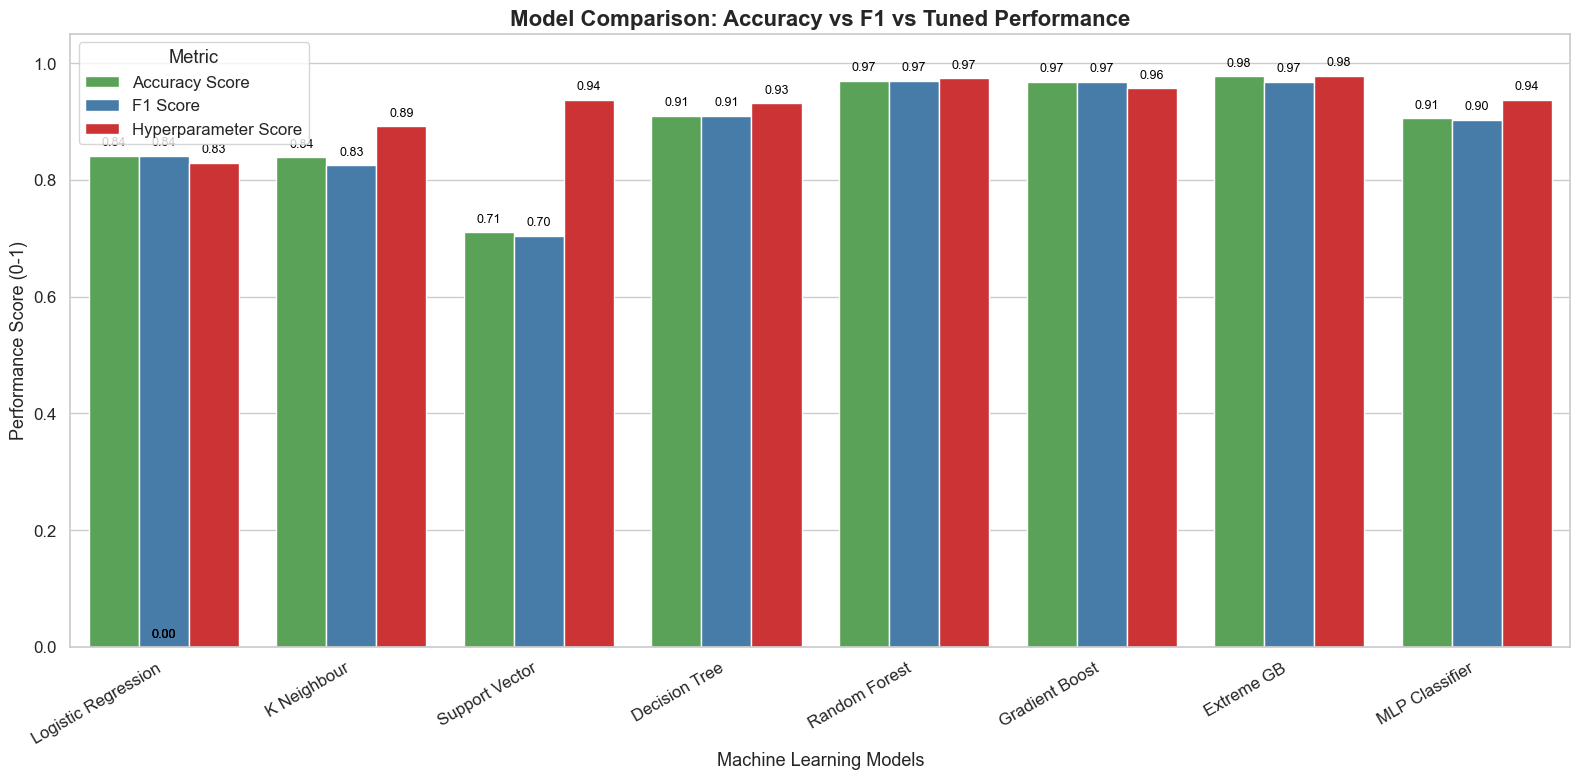

In [202]:
metrics = {
    "Model_name": ['Logistic Regression','K Neighbour','Support Vector','Decision Tree',
                   'Random Forest','Gradient Boost','Extreme GB','MLP Classifier'],
    "Accuracy Score": [acc_log , acc_knn , acc_svc , acc_tree ,
                       acc_forest , acc_gbc , acc_xgb , acc_ann], 
    "F1 Score": [f1_log , f1_knn , f1_svc , f1_tree , f1_forest , f1_gbc , f1_xgb , f1_mlp],
    "Hyperparameter Score": [acc_hyp_log , acc_hyp_knn , acc_hyp_svc , acc_hyp_tree ,
                             acc_hyp_forest , acc_hyp_gbc , acc_hyp_xgb , accuracy]
}

df = pd.DataFrame(metrics)

df_melted = df.melt(id_vars='Model_name', var_name='Metric', value_name='Score')
plt.figure(figsize=(16, 8))
sns.set(style='whitegrid', font_scale=1.1)
palette = {
    'Accuracy Score': '#4daf4a',      # green
    'F1 Score': '#377eb8',            # blue
    'Hyperparameter Score': '#e41a1c' # red
}

# Barplot
barplot = sns.barplot(
    data=df_melted,
    x='Model_name',
    y='Score',
    hue='Metric',
    palette=palette
)

#value labels
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=9, color='black', xytext=(0, 5),
                     textcoords='offset points')
plt.title('Model Comparison: Accuracy vs F1 vs Tuned Performance', fontsize=16, weight='bold')
plt.xlabel('Machine Learning Models', fontsize=13)
plt.ylabel('Performance Score (0-1)', fontsize=13)
plt.ylim(0, 1.05)
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric', loc='upper left')
plt.tight_layout()

plt.show()


## MODEL RANKING BY TUNED ACCURACY SCORE

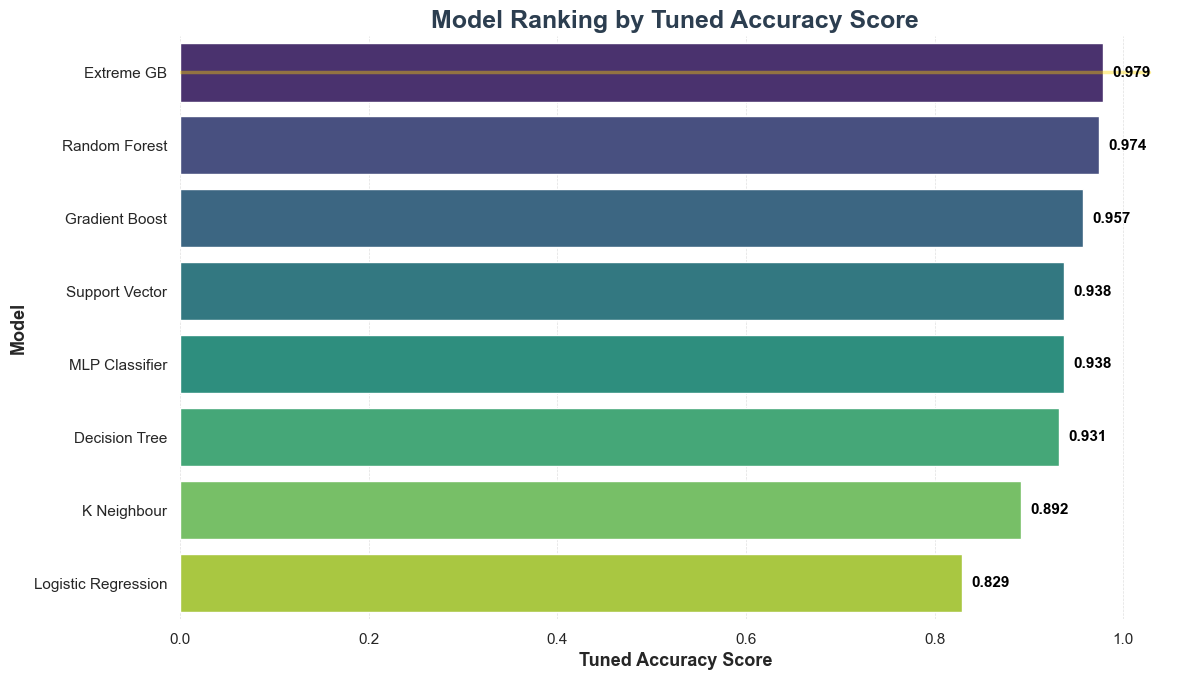

In [205]:
ranking_df = df[["Model_name", "Hyperparameter Score"]].sort_values(
    by="Hyperparameter Score", ascending=False).reset_index(drop=True)
colors = sns.color_palette("viridis", len(ranking_df))

# Plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=ranking_df,
    x="Hyperparameter Score",
    y="Model_name",
    palette=colors
)

for i, (score, model) in enumerate(zip(ranking_df["Hyperparameter Score"], ranking_df["Model_name"])):
    plt.text(score + 0.01, i, f"{score:.3f}",
             color='black', va='center',
             fontsize=11, fontweight='bold')

plt.axhline(y=0, xmin=0, xmax=ranking_df.iloc[0]["Hyperparameter Score"],
            color='gold', linewidth=2.5, alpha=0.4)
plt.title("Model Ranking by Tuned Accuracy Score", fontsize=18, weight='bold', color="#2c3e50")
plt.xlabel("Tuned Accuracy Score", fontsize=13, weight='bold')
plt.ylabel("Model", fontsize=13, weight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlim(0, 1.05)
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## SAVE ALL TUNED MODELS


In [210]:
import joblib
import os

# CREATE DIRECTORY
os.makedirs("saved_models", exist_ok=True)

# DICTIONARY OF MODEL NAMES AND OBJECTS
models = {
    "logistic_regression": log_reg_hyp,
    "knn": knn_hyp,
    "svc": svc_hyp,
    "decision_tree": tree_hyp,
    "random_forest": hyp_forest,
    "gradient_boosting": hyp_gbc,
    "xgboost": Xgb_hyp,
    "mlp_classifier": best_mlp
}

# SAVE EACH MODEL TO A .PKL FILE
for name, model in models.items():
    path = f"saved_models/{name}.pkl"
    joblib.dump(model, path)
    print(f"✅ SAVED: {path}")


✅ SAVED: saved_models/logistic_regression.pkl
✅ SAVED: saved_models/knn.pkl
✅ SAVED: saved_models/svc.pkl
✅ SAVED: saved_models/decision_tree.pkl
✅ SAVED: saved_models/random_forest.pkl
✅ SAVED: saved_models/gradient_boosting.pkl
✅ SAVED: saved_models/xgboost.pkl
✅ SAVED: saved_models/mlp_classifier.pkl


## SAVE ONLY THE BEST MODEL (XGBoost)

In [213]:
# CREATE A DIRECTORY TO STORE THE BEST MODEL
os.makedirs("best_model", exist_ok=True)

# SAVE THE XGBOOST MODEL
joblib.dump(Xgb_hyp, "best_model/xgboost_best_model.pkl")

print("✅ XGBoost model saved as 'best_model/xgboost_best_model.pkl'")

✅ XGBoost model saved as 'best_model/xgboost_best_model.pkl'


## TO LOAD LATER:

In [ ]:
# LOAD THE SAVED XGBOOST MODEL
from xgboost import XGBClassifier
import joblib

xgb_model = joblib.load("best_model/xgboost_best_model.pkl")
y_pred = xgb_model.predict(X_test)
